In [1]:
%pylab inline

import pandas as pd
import pickle
import matplotlib.dates as md
import statsmodels.api as sm
import scipy.stats as dists

from scipy.misc import factorial
from scipy.optimize import minimize

tableau = pickle.load(open('tableau.colors', 'rb'))

rcParams['figure.figsize'] = (10,8)
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler('color', tableau)

xfmt = md.DateFormatter('%H:%M:%S')

Populating the interactive namespace from numpy and matplotlib


In [20]:
df = pd.read_csv('../GDAX/data/2016-10-08.trades.csv', index_col=0)
df.t = pd.to_datetime(1e9*df.t)

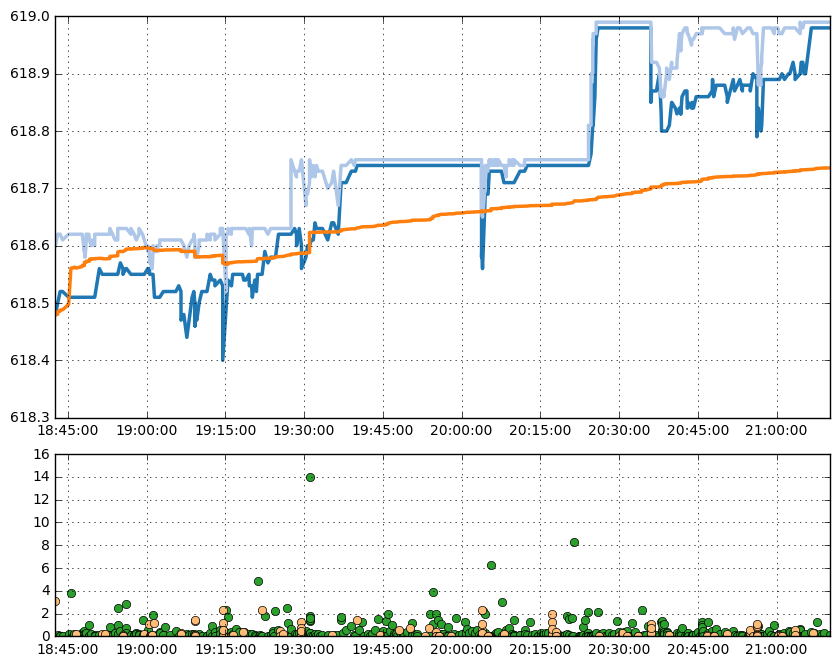

In [24]:
ax = []
ax.append(subplot2grid((3,1),(0,0), rowspan=2))
ax.append(subplot2grid((3,1),(2,0)))

ax[0].plot(df.t, df.bid)
ax[0].plot(df.t, df.ask)
ax[0].plot(df.t, (df.px * df.sz).cumsum() / df.sz.cumsum())
ax[1].plot(df.t.loc[df.sd == 'b'], df.sz.loc[df.sd == 'b'], 'o', c=tableau[4])
ax[1].plot(df.t.loc[df.sd == 's'], df.sz.loc[df.sd == 's'], 'o', c=tableau[3])

ax[0].xaxis.set_major_formatter(xfmt)
ax[0].yaxis.get_major_formatter().set_useOffset(False)
ax[1].xaxis.set_major_formatter(xfmt)

In [22]:
len(df.loc[df.sd == 'b']) / len(df)

0.7873799725651578

In [38]:
(df.t - df.t.shift(1)).mean().total_seconds()

12.166208791